In [159]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import missingno as mo
from matplotlib import pyplot as plt

In [160]:
train = pd.read_csv('../data/train.csv',index_col='Id')

In [161]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### find missing values

<Figure size 3600x1800 with 0 Axes>

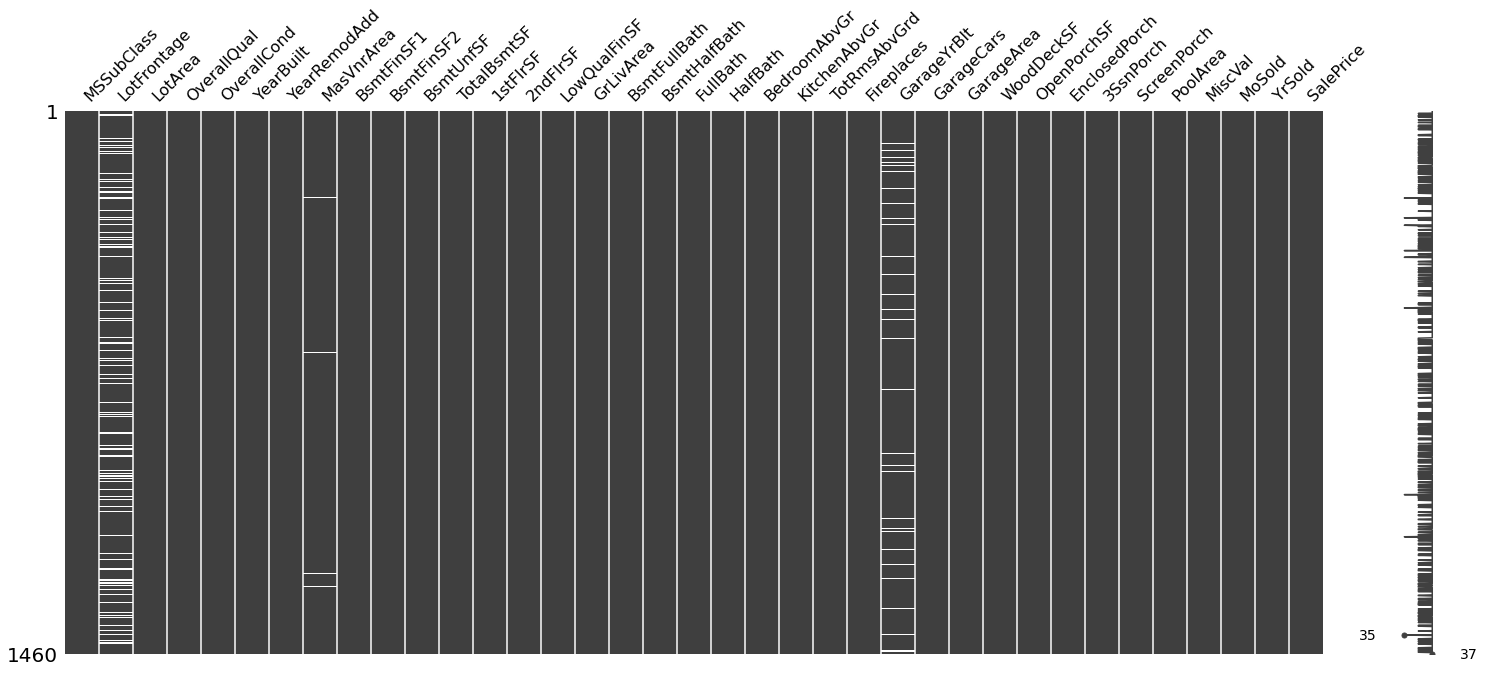

In [162]:
plt.figure(figsize=[12,6],dpi=300)
mo.matrix(train.select_dtypes(include=np.number))
plt.show()

<Figure size 3600x1800 with 0 Axes>

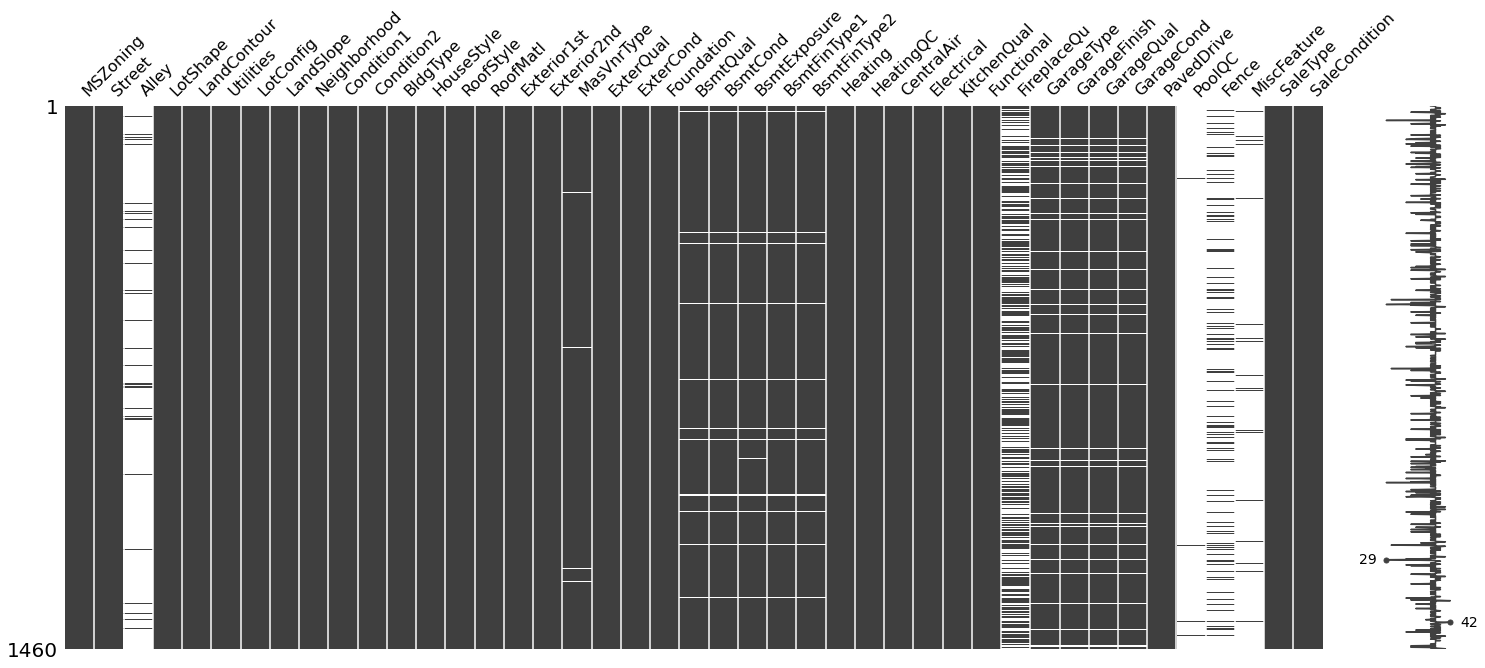

In [163]:
plt.figure(figsize=[12,6],dpi=300)
mo.matrix(train.select_dtypes(include=np.object))
plt.show()

In [164]:
# train data
mask = train.isna().sum()
mask = mask[mask>0].sort_values(ascending=False)
mask

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [165]:
mask.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [166]:
num_feature_miss = train[mask.index].select_dtypes(include=np.number)
cat_feature_miss = train[mask.index].select_dtypes(include=np.object)

In [167]:
np.mean(num_feature_miss['LotFrontage'])

70.04995836802665

In [168]:
# impute lotfrontarea
impute_with = train[['Street','LotFrontage']].groupby(by='Street')['LotFrontage'].mean().to_dict()
impute_with

{'Grvl': 85.4, 'Pave': 69.98578595317726}

In [169]:
replace_with = train.Street.map(impute_with)
train['LotFrontage'] = np.where(train.LotFrontage.isna(),replace_with,train.LotFrontage)

In [170]:
train[['LotFrontage']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [171]:
# impute garage built year
num_feature_miss[['GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1379 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [172]:
train['GarageYrBlt'].fillna(value=0, inplace=True)

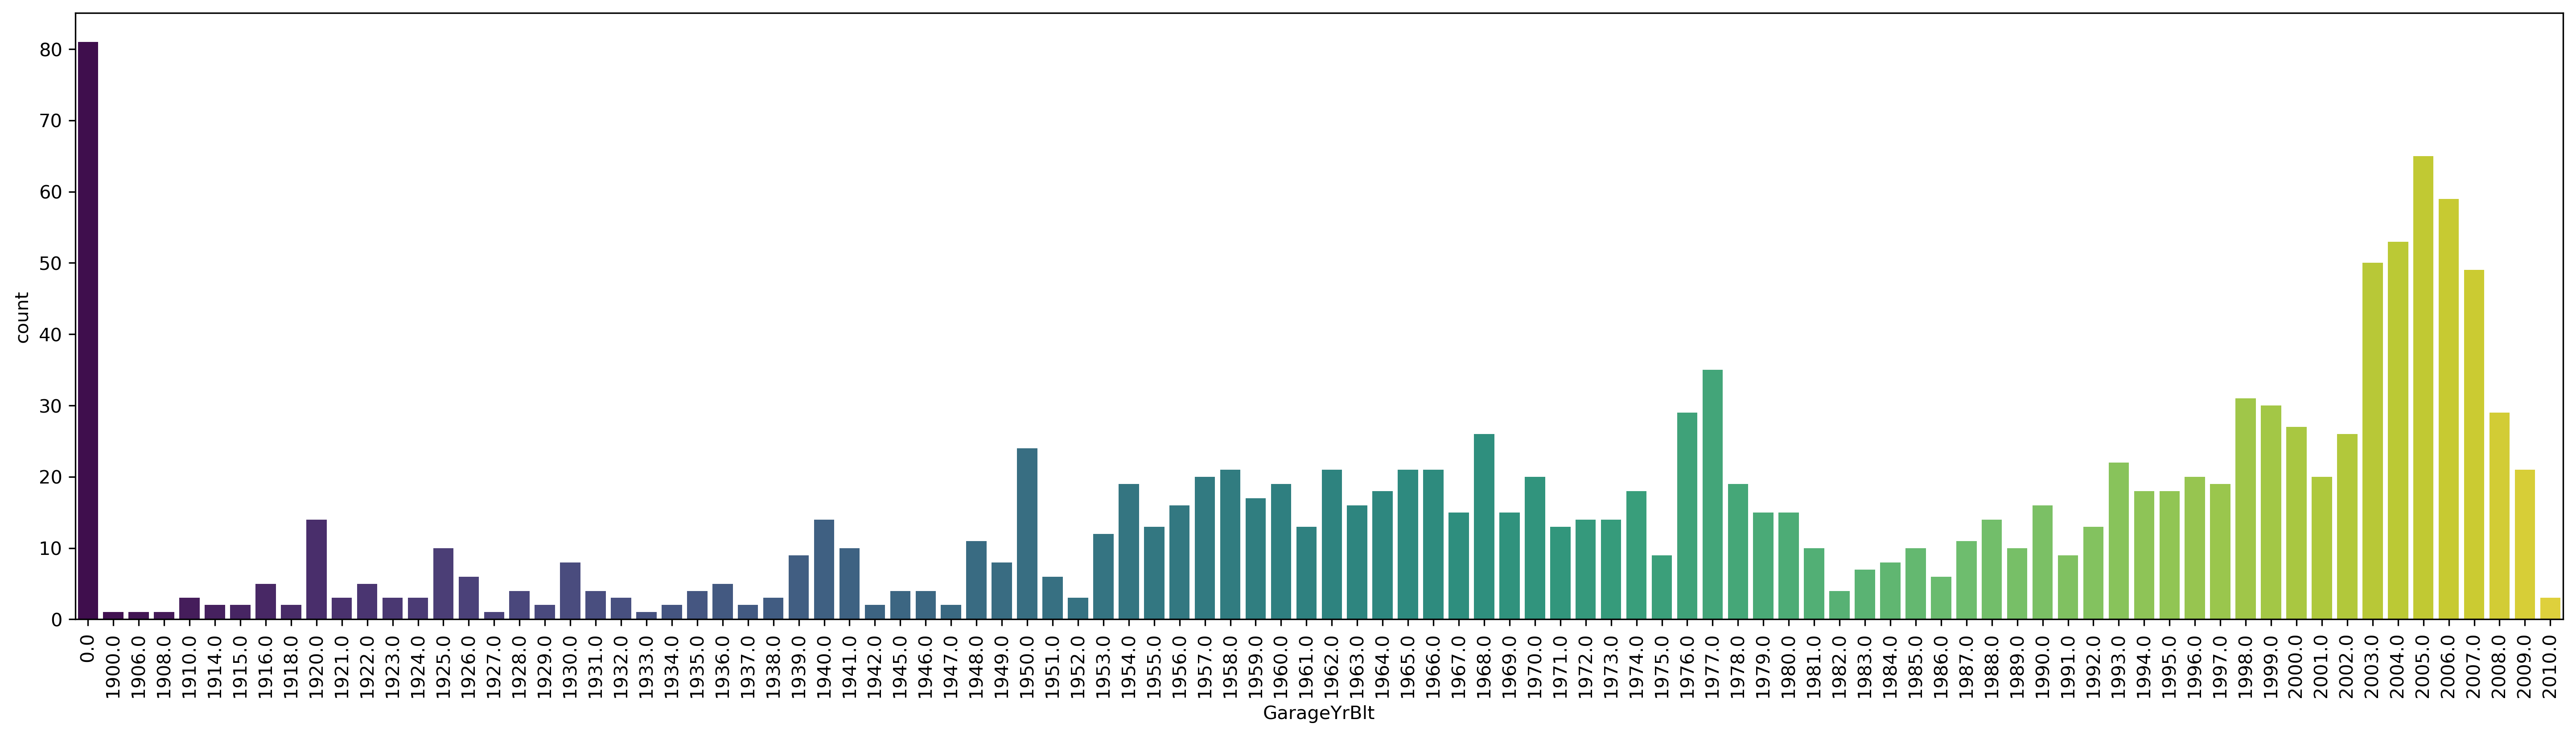

In [173]:
plt.figure(figsize=[24,6],dpi=300)
g = sns.countplot(x=train['GarageYrBlt'],palette='viridis')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [174]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)
train['GarageYrBlt']

Id
1       2003
2       1976
3       2001
4       1998
5       2000
        ... 
1456    1999
1457    1978
1458    1941
1459    1950
1460    1965
Name: GarageYrBlt, Length: 1460, dtype: int32

In [175]:
num_feature_miss[['MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrArea  1452 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [176]:
# impute masvnrarea and msvnrtype
impute_with = train[['MasVnrArea','MasVnrType']].groupby(by='MasVnrType')['MasVnrArea'].mean().to_dict()
impute_with

{'BrkCmn': 247.66666666666666,
 'BrkFace': 259.00898876404494,
 'None': 1.0949074074074074,
 'Stone': 239.3046875}

In [177]:
train[['HouseStyle','MasVnrType']].groupby(by=['HouseStyle','MasVnrType'])['MasVnrType'].count()/train.shape[0]

HouseStyle  MasVnrType
1.5Fin      BrkCmn        0.001370
            BrkFace       0.008219
            None          0.095890
1.5Unf      None          0.009589
1Story      BrkCmn        0.006849
            BrkFace       0.150000
            None          0.278082
            Stone         0.058904
2.5Fin      None          0.005479
2.5Unf      None          0.007534
2Story      BrkCmn        0.002055
            BrkFace       0.111644
            None          0.162329
            Stone         0.026712
SFoyer      BrkFace       0.007534
            None          0.016438
            Stone         0.001370
SLvl        BrkFace       0.027397
            None          0.016438
            Stone         0.000685
Name: MasVnrType, dtype: float64

In [178]:
impute_with = {'1.5Fin':'None',
               '1.5Unf':'None',
               '1Story':'Stone',
               '2.5Fin':'None',
               '2.5Unf':'None',
               '2Story':'None',
               'SFoyer':'None',
               'SLvl':'BrkFace'}
replace_with = train.HouseStyle.map(impute_with)
train['MasVnrType'] = np.where(train.MasVnrType.isna(),replace_with,train.MasVnrType)

In [179]:
train[['MasVnrType']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MasVnrType  1460 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [180]:
impute_with = train[['MasVnrArea','MasVnrType']].groupby(by=['MasVnrType'])['MasVnrArea'].mean().to_dict()
impute_with

{'BrkCmn': 247.66666666666666,
 'BrkFace': 259.00898876404494,
 'None': 1.0949074074074074,
 'Stone': 239.3046875}

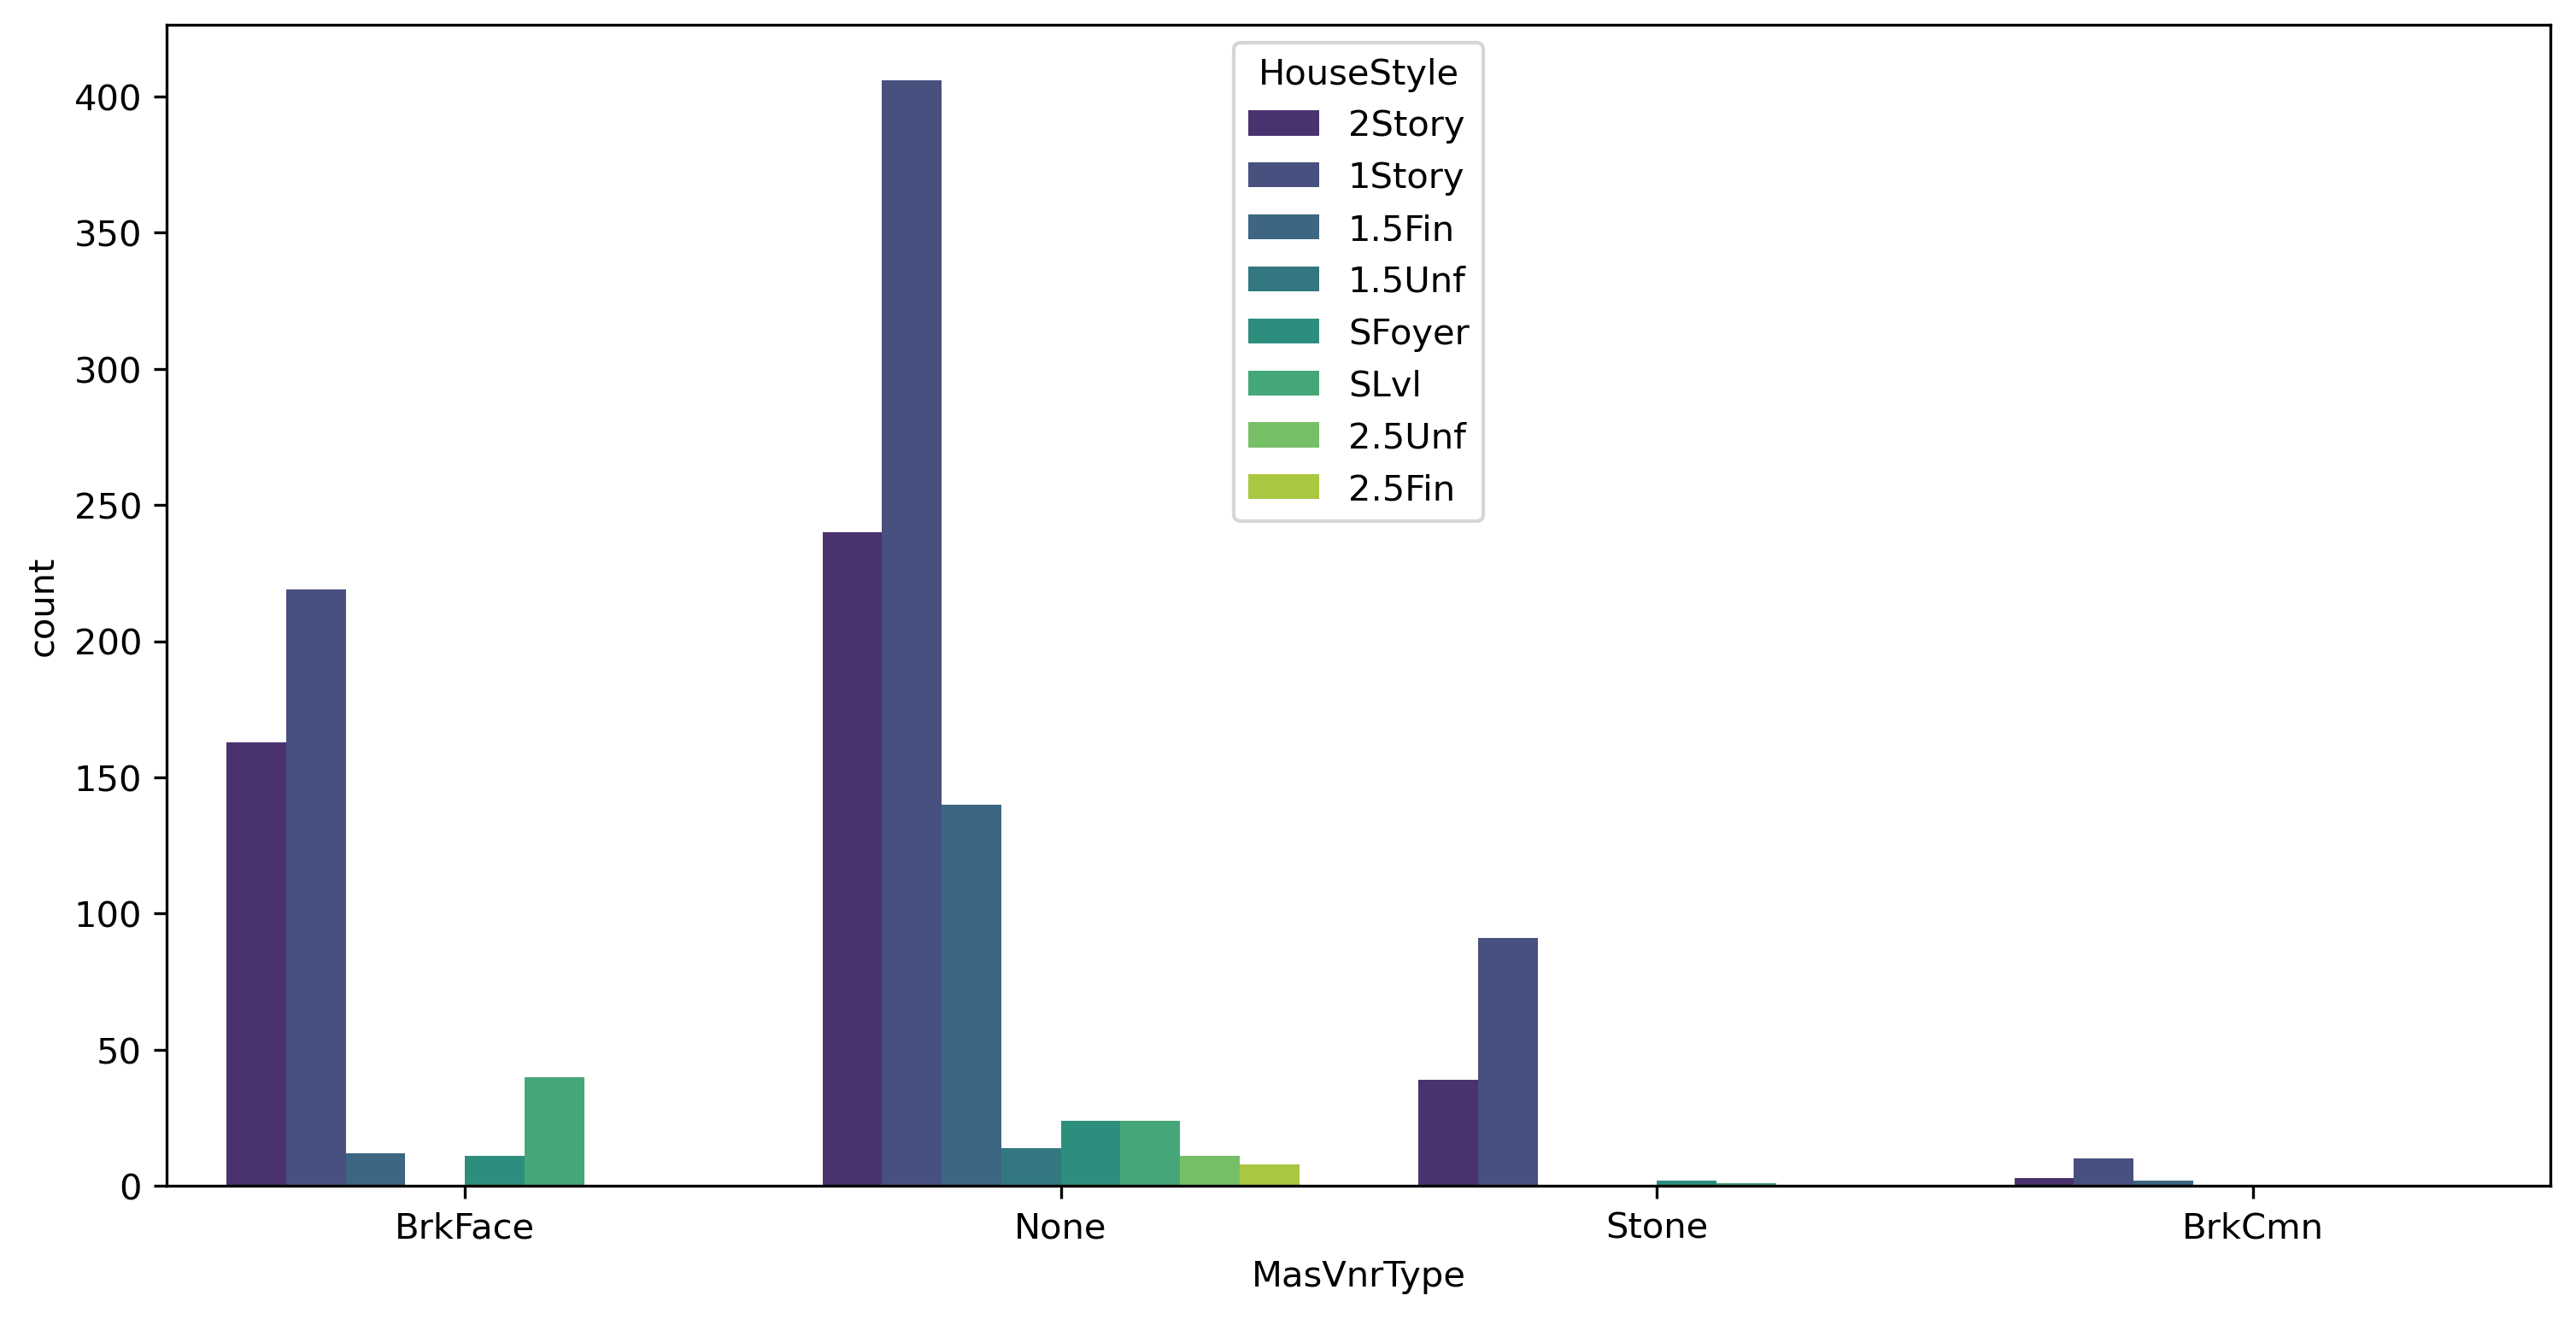

In [181]:
plt.figure(figsize=[12,6],dpi=300)
g = sns.countplot(x=train['MasVnrType'],hue=train['HouseStyle'],palette='viridis')
# g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [182]:
replace_with = train['MasVnrType'].map(impute_with)
train['MasVnrArea'] = np.where(train.MasVnrArea.isna(),replace_with,train.MasVnrArea)

In [183]:
train[['MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrArea  1460 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [184]:
# categorical feature imputation
cat_feature_miss

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical
Id,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,Attchd,RFn,TA,TA,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr
2,NaN,NaN,NaN,NaN,TA,Attchd,RFn,TA,TA,Gd,Unf,ALQ,TA,Gd,None,SBrkr
3,NaN,NaN,NaN,NaN,TA,Attchd,RFn,TA,TA,Mn,Unf,GLQ,TA,Gd,BrkFace,SBrkr
4,NaN,NaN,NaN,NaN,Gd,Detchd,Unf,TA,TA,No,Unf,ALQ,Gd,TA,None,SBrkr
5,NaN,NaN,NaN,NaN,TA,Attchd,RFn,TA,TA,Av,Unf,GLQ,TA,Gd,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,NaN,NaN,NaN,NaN,TA,Attchd,RFn,TA,TA,No,Unf,Unf,TA,Gd,None,SBrkr
1457,NaN,NaN,NaN,MnPrv,TA,Attchd,Unf,TA,TA,No,Rec,ALQ,TA,Gd,Stone,SBrkr
1458,NaN,Shed,NaN,GdPrv,Gd,Attchd,RFn,TA,TA,No,Unf,GLQ,Gd,TA,None,SBrkr


In [185]:
train[['PoolQC','MiscFeature','Alley','Fence']] = train.loc[:,['PoolQC','MiscFeature','Alley','Fence']].fillna(value='None')

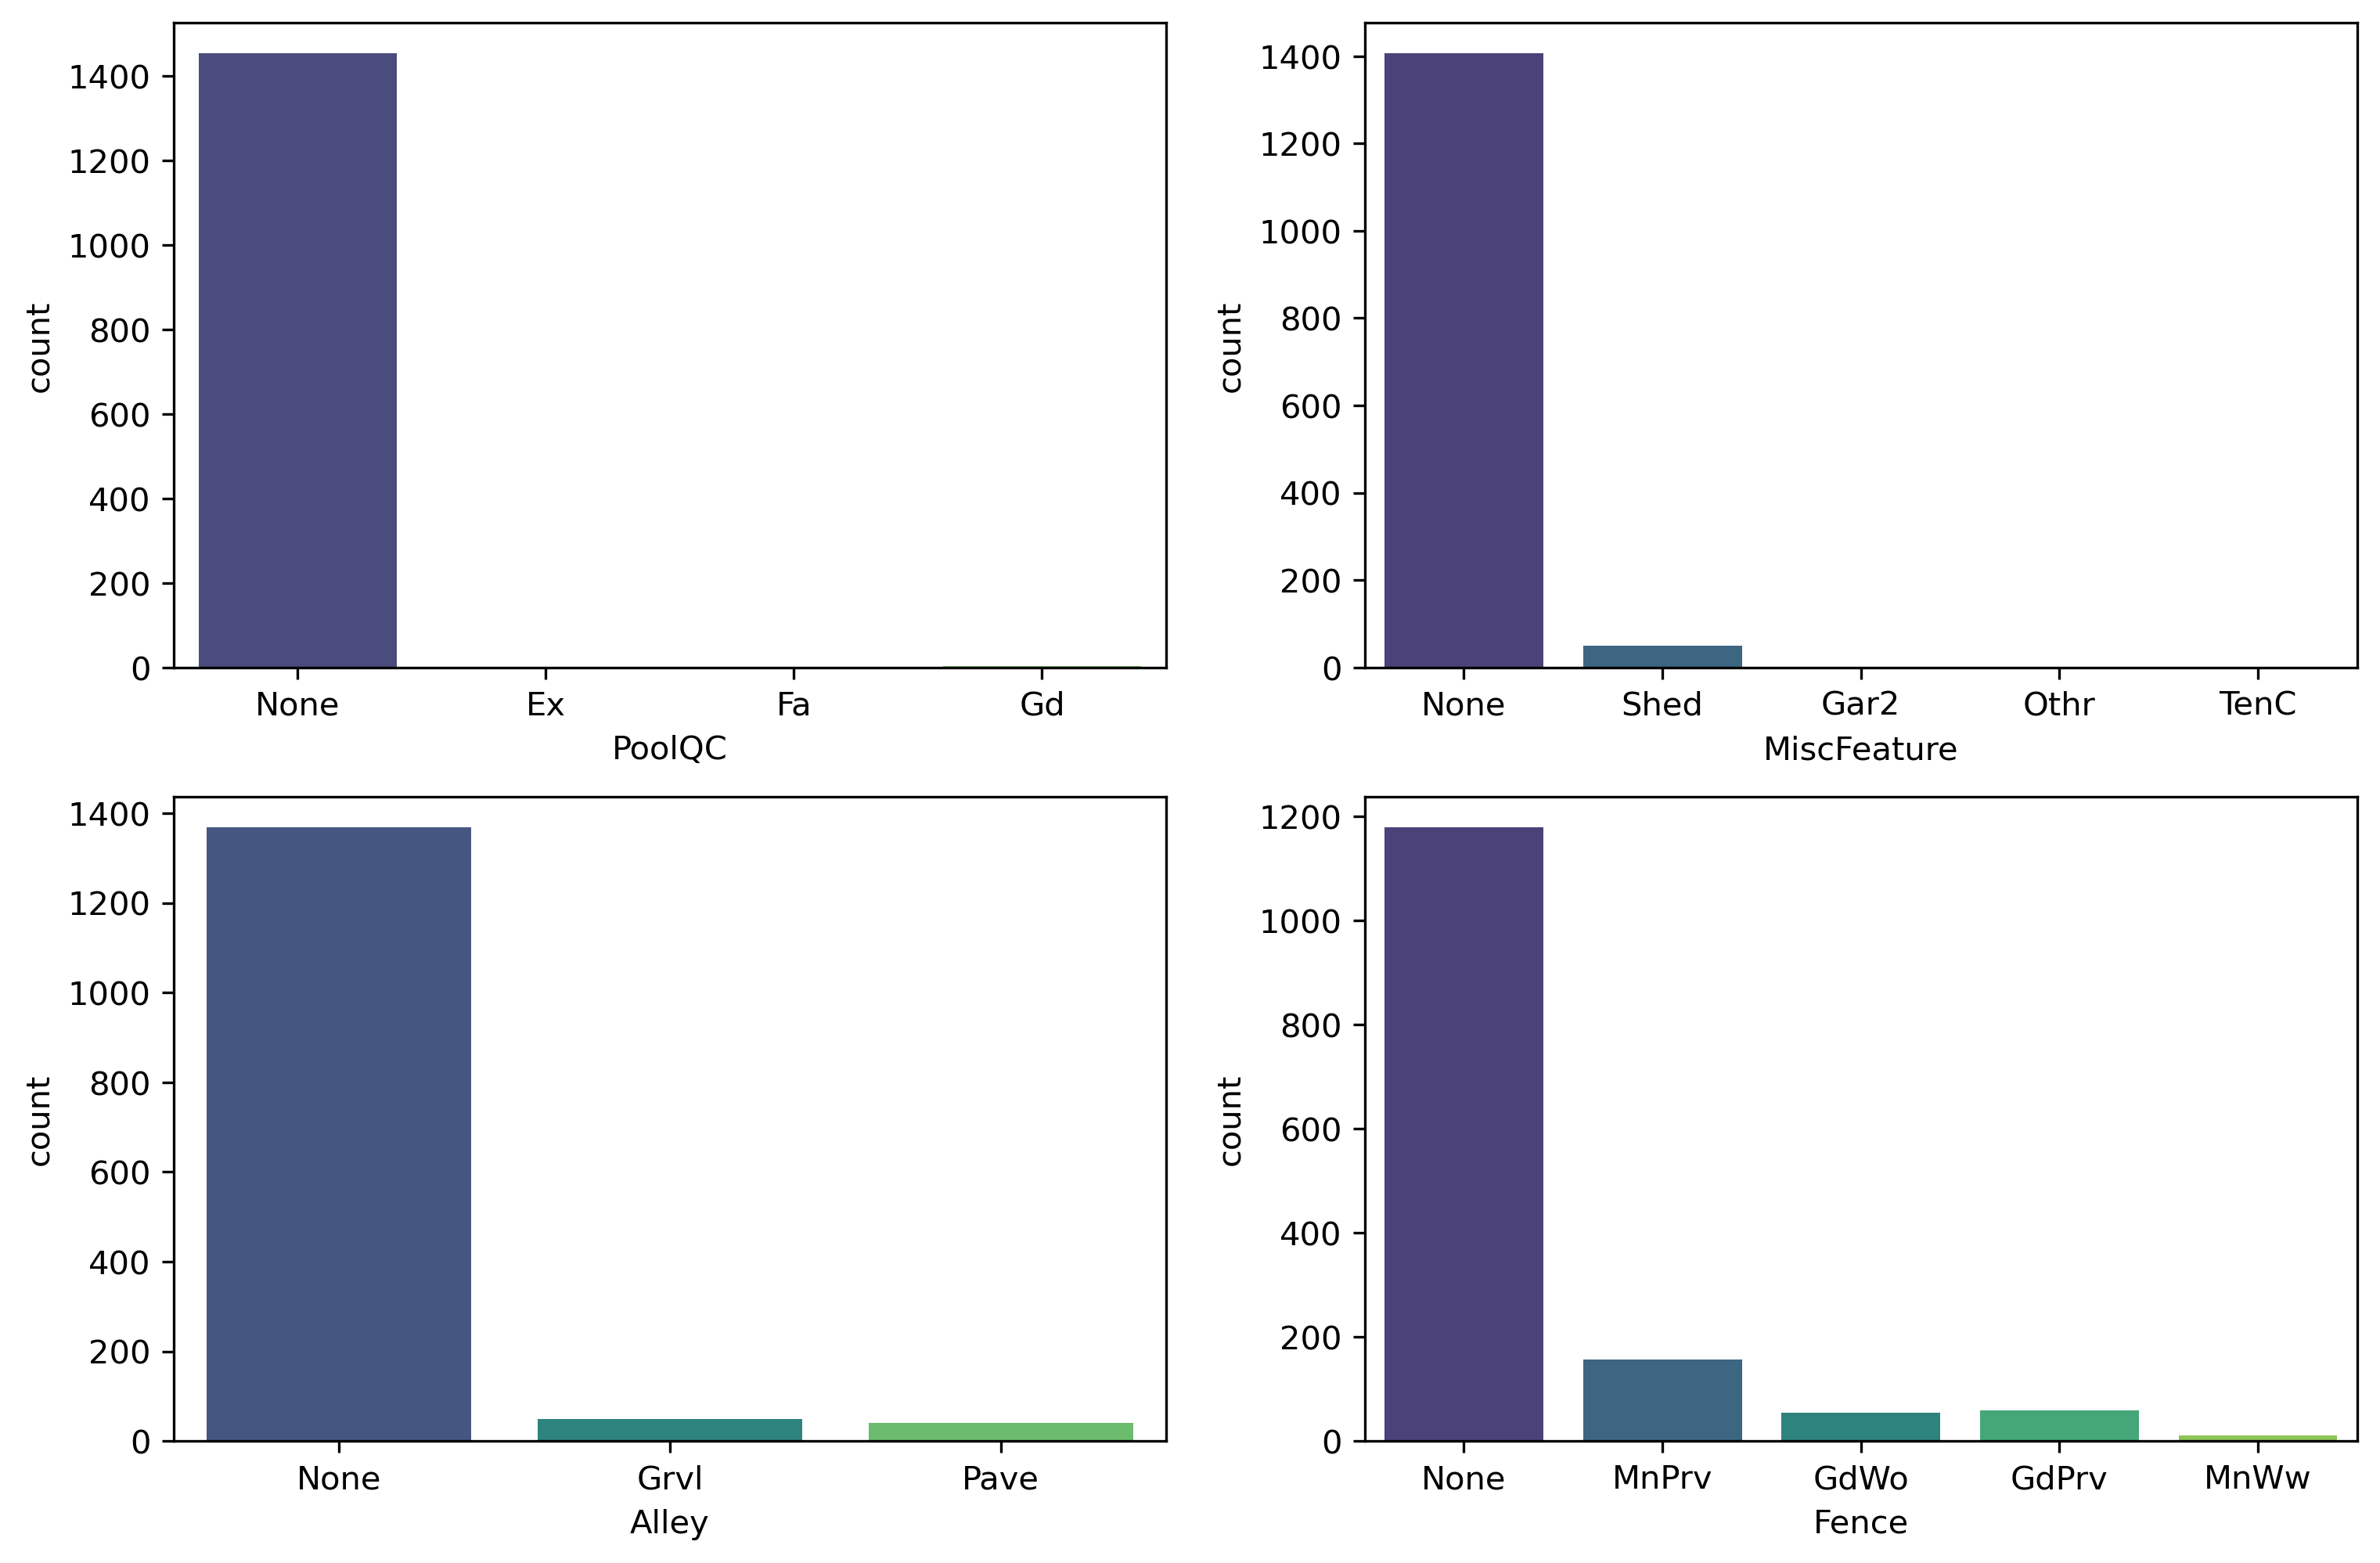

In [186]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=[12,8],dpi=300)
ax = axes.ravel()
sns.countplot(x=train['PoolQC'],ax=ax[0],palette='viridis')
sns.countplot(x=train['MiscFeature'],ax=ax[1],palette='viridis')
sns.countplot(x=train['Alley'],ax=ax[2],palette='viridis')
sns.countplot(x=train['Fence'],ax=ax[3],palette='viridis')
plt.show()

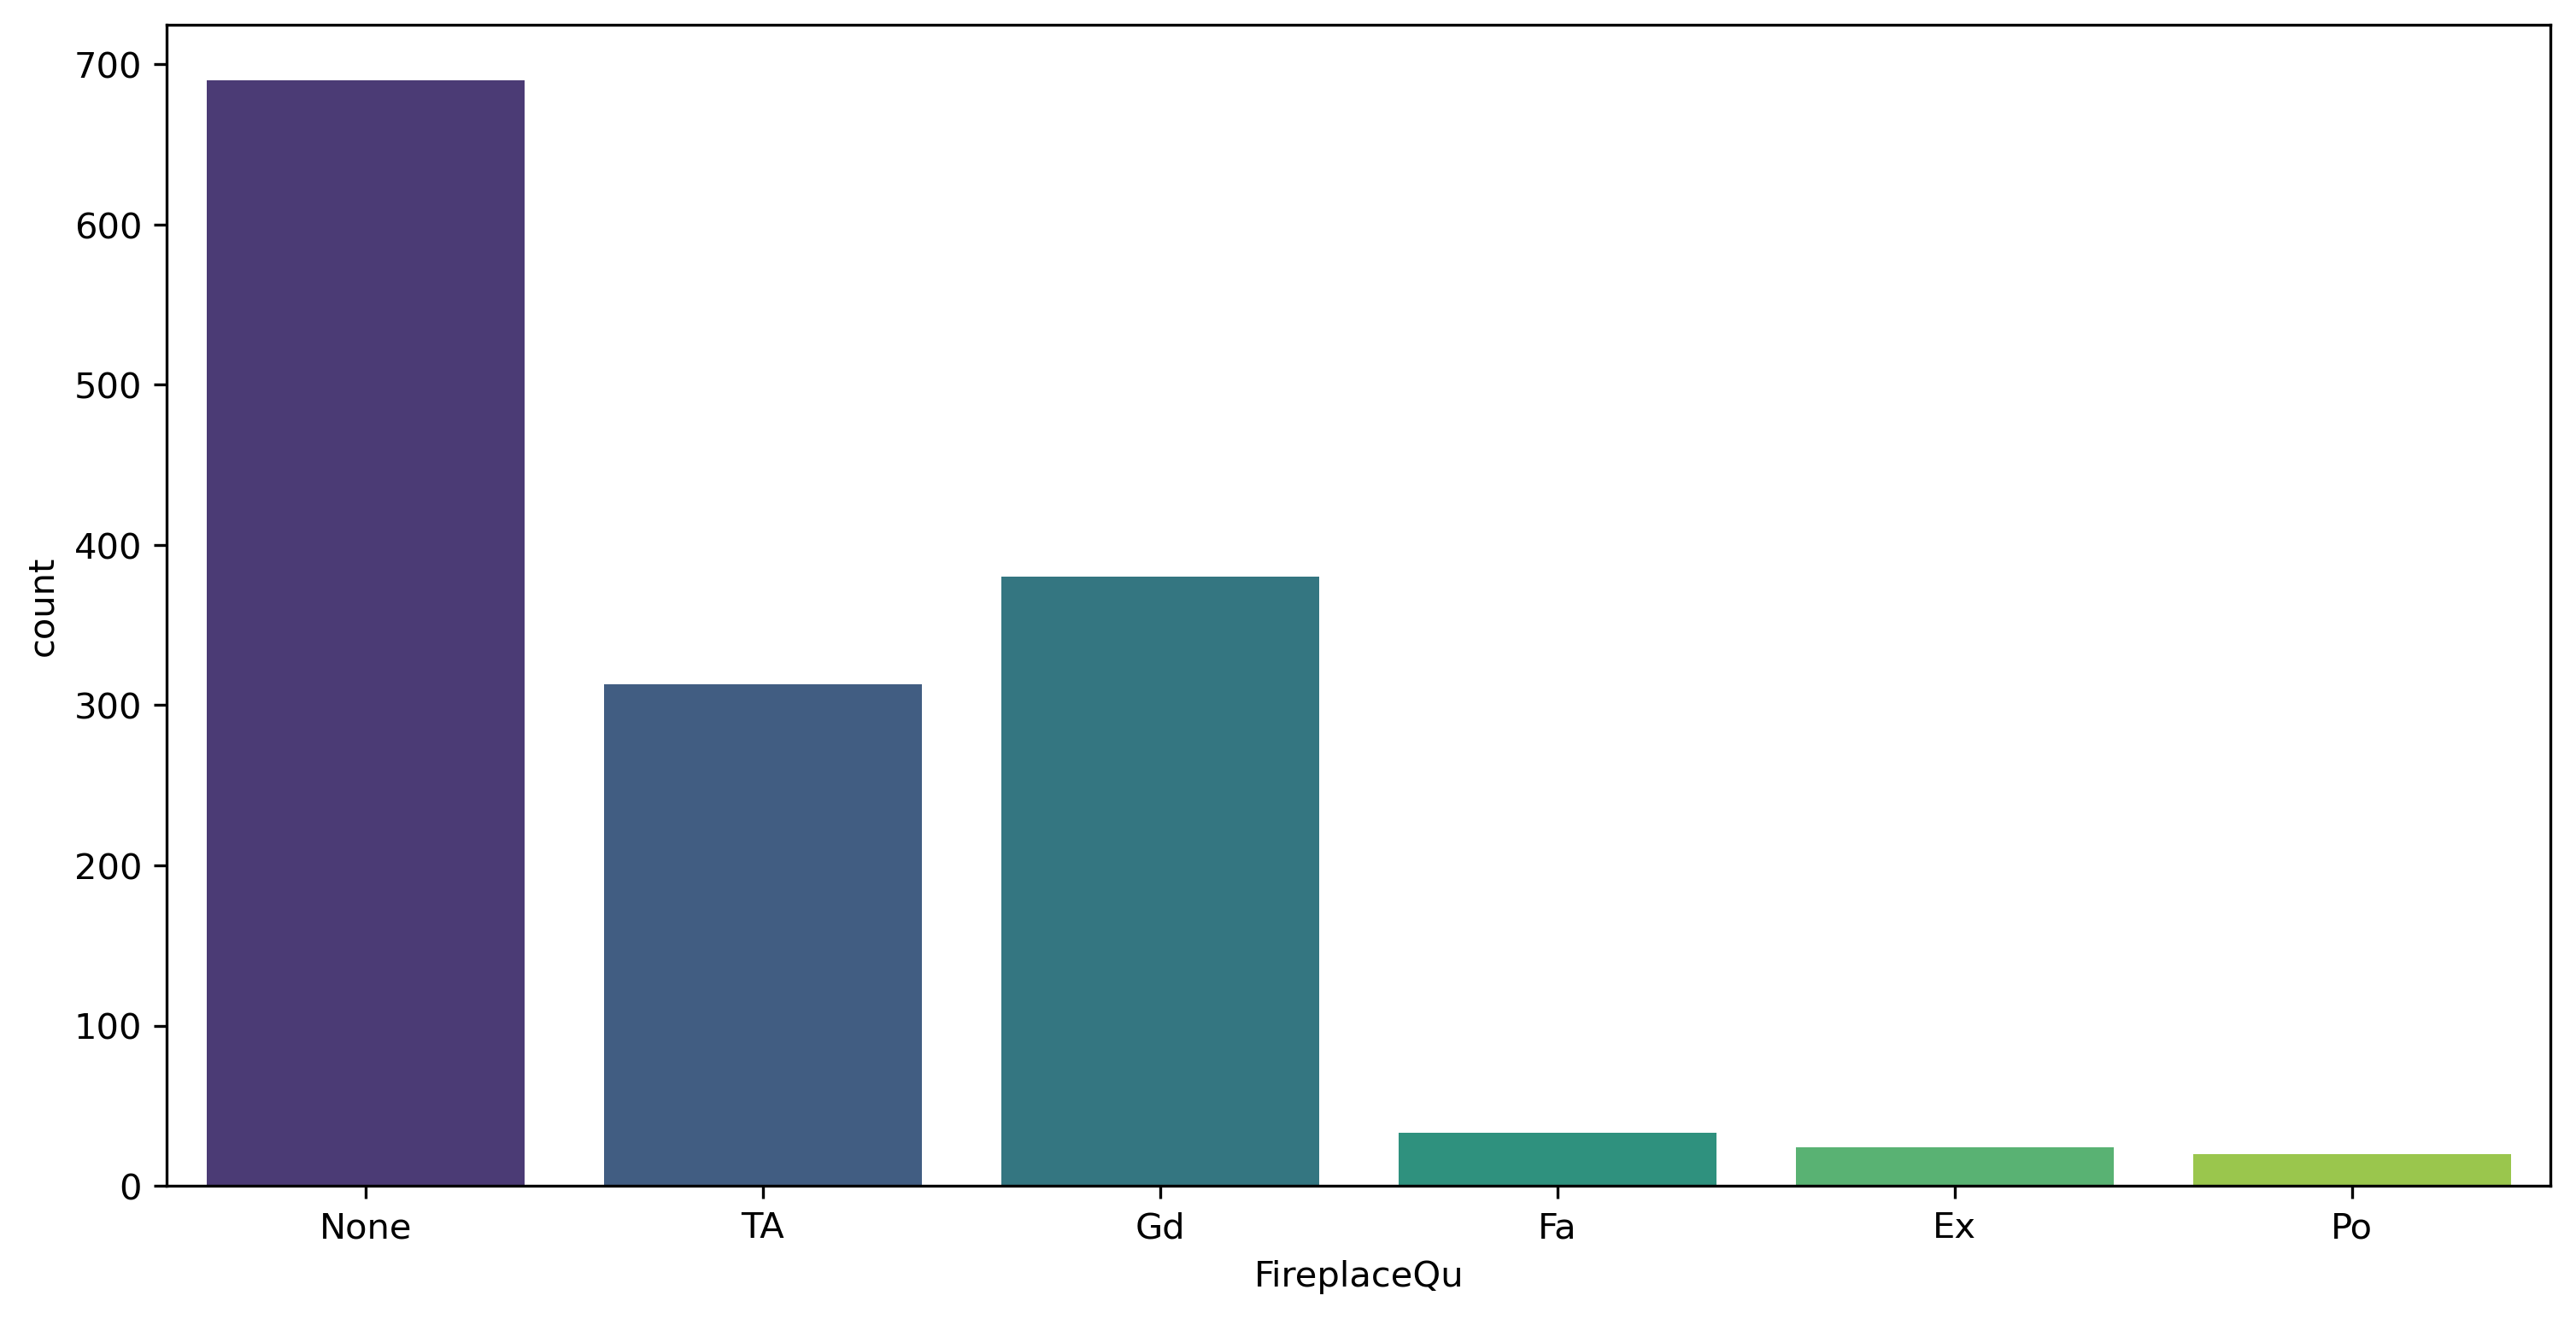

In [187]:
train['FireplaceQu'].fillna(value='None',inplace=True)

plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=train['FireplaceQu'],palette='viridis')
plt.show()

In [188]:
pd.options.display.max_rows = 81
train[train['GarageType'].isna()][['GarageType','GarageFinish','GarageQual','GarageCond']]

,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,
40,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN


In [189]:
train[['GarageType','GarageFinish','GarageQual','GarageCond']] = train.loc[:,['GarageType','GarageFinish','GarageQual','GarageCond']].fillna(value='None')

In [190]:
train[train['BsmtExposure'].isna()][['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [191]:
train[['BsmtQual','BsmtCond','BsmtFinType1']] = train.loc[:,['BsmtQual','BsmtCond','BsmtFinType1']].fillna(value='None')

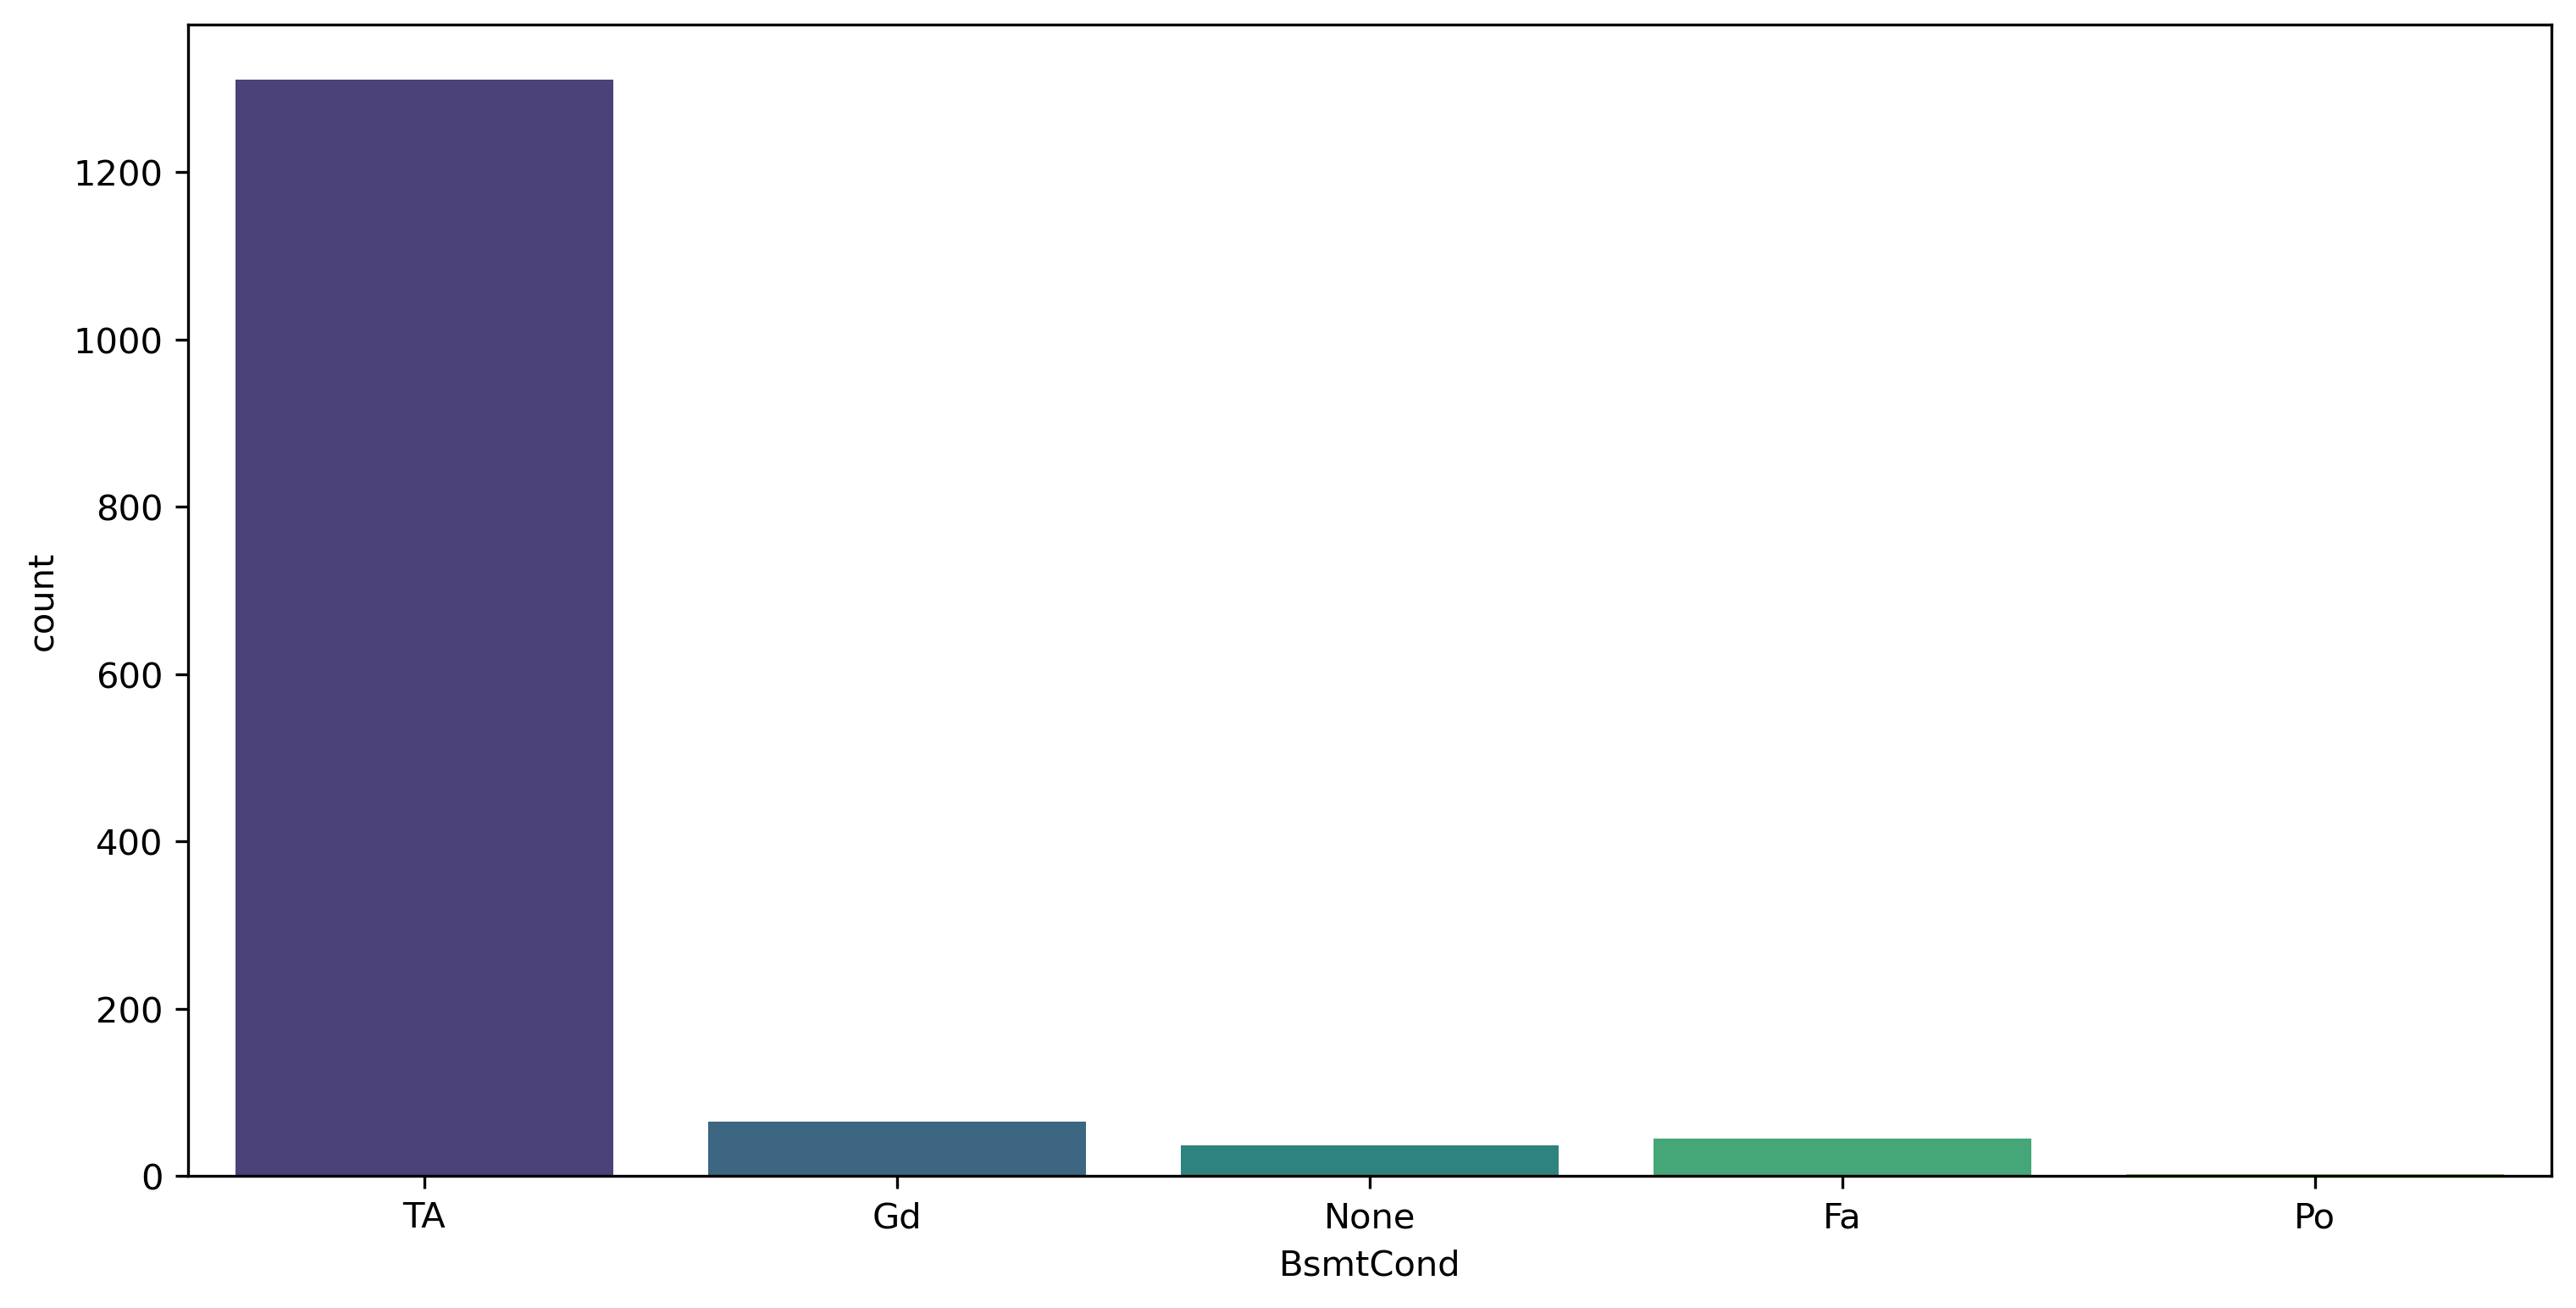

In [192]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=train['BsmtCond'],palette='viridis')
plt.show()

In [193]:
train[['BsmtCond','BsmtExposure']].groupby(by=['BsmtCond','BsmtExposure'])['BsmtExposure'].count()/train.shape[0]

BsmtCond  BsmtExposure
Fa        Gd              0.000685
          Mn              0.003425
          No              0.026712
Gd        Av              0.009589
          Gd              0.006849
          Mn              0.003425
          No              0.024658
Po        Gd              0.000685
          No              0.000685
TA        Av              0.141781
          Gd              0.083562
          Mn              0.071233
          No              0.600685
Name: BsmtExposure, dtype: float64

In [194]:
impute_with = {'Fa':'No',
               'Gd':'No',
               'None':'None',
               'Po':'Gd',
               'TA':'No'}
replace_with = train.BsmtCond.map(impute_with)
train['BsmtExposure'] = np.where(train['BsmtExposure'].isna(),impute_with,train['BsmtExposure'])

In [195]:
train[['BsmtCond','BsmtFinType2']].groupby(by=['BsmtCond','BsmtFinType2'])['BsmtFinType2'].count()/train.shape[0]

BsmtCond  BsmtFinType2
Fa        LwQ             0.000685
          Rec             0.000685
          Unf             0.029452
Gd        ALQ             0.003425
          BLQ             0.002055
          GLQ             0.000685
          LwQ             0.002055
          Rec             0.002055
          Unf             0.034247
Po        Unf             0.001370
TA        ALQ             0.009589
          BLQ             0.020548
          GLQ             0.008904
          LwQ             0.028767
          Rec             0.034247
          Unf             0.795205
Name: BsmtFinType2, dtype: float64

In [196]:
impute_with = {'Fa':'Unf',
               'Gd':'Unf',
               'None':'None',
               'Po':'Unf',
               'TA':'Unf'}
replace_with = train.BsmtCond.map(impute_with)
train['BsmtFinType2'] = np.where(train['BsmtFinType2'].isna(),impute_with,train['BsmtFinType2'])

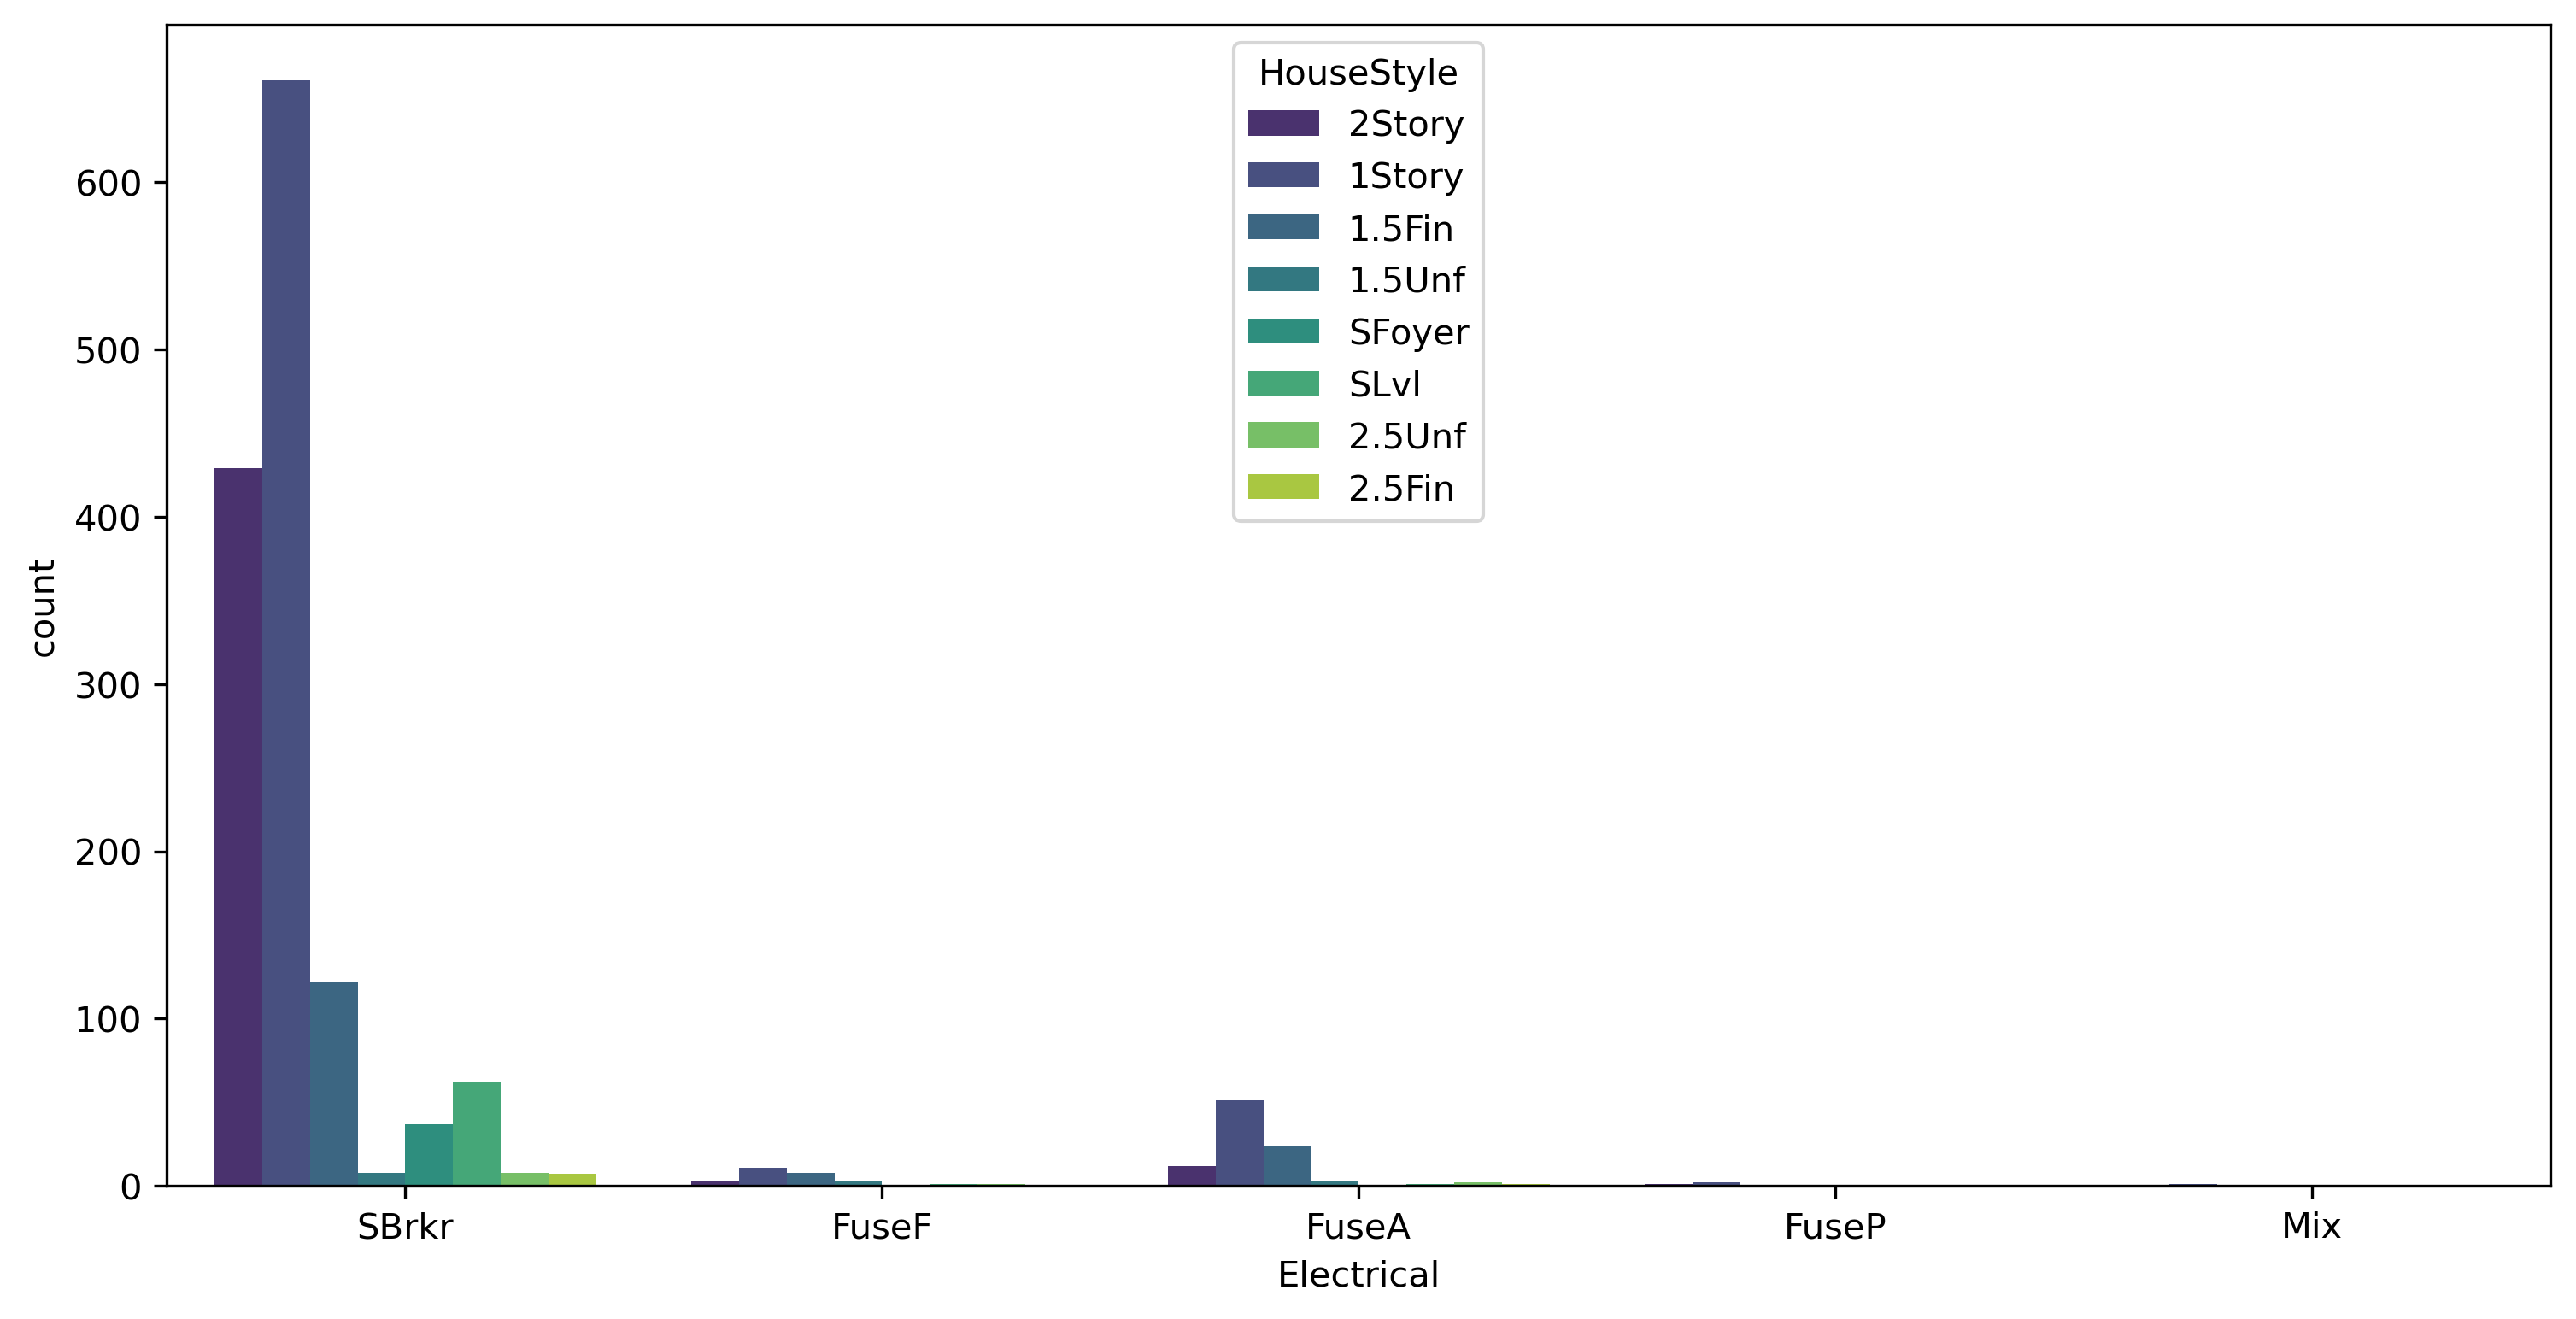

In [197]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=train['Electrical'],hue=train['HouseStyle'],palette='viridis')
plt.show()

In [198]:
train[['HouseStyle','Electrical']].groupby(by=['HouseStyle','Electrical'])['Electrical'].count()/train.shape[0]

HouseStyle  Electrical
1.5Fin      FuseA         0.016438
            FuseF         0.005479
            SBrkr         0.083562
1.5Unf      FuseA         0.002055
            FuseF         0.002055
            SBrkr         0.005479
1Story      FuseA         0.034932
            FuseF         0.007534
            FuseP         0.001370
            Mix           0.000685
            SBrkr         0.452740
2.5Fin      FuseA         0.000685
            SBrkr         0.004795
2.5Unf      FuseA         0.001370
            FuseF         0.000685
            SBrkr         0.005479
2Story      FuseA         0.008219
            FuseF         0.002055
            FuseP         0.000685
            SBrkr         0.293836
SFoyer      SBrkr         0.025342
SLvl        FuseA         0.000685
            FuseF         0.000685
            SBrkr         0.042466
Name: Electrical, dtype: float64

In [199]:
train[train['Electrical'].isna()]['HouseStyle']

Id
1380    SLvl
Name: HouseStyle, dtype: object

In [200]:
train['Electrical'].fillna(value='SBrkr',inplace=True)

In [201]:
train[['Electrical']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Electrical  1460 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [203]:
pd.to_pickle(train,'../data/cleaned_train.pkl')